<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Importing-the-Libraries" data-toc-modified-id="Importing-the-Libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing the Libraries</a></span></li><li><span><a href="#Loading-&amp;-Getting-Familiar-with-Datasets" data-toc-modified-id="Loading-&amp;-Getting-Familiar-with-Datasets-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Loading &amp; Getting Familiar with Datasets</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature Engineering</a></span></li><li><span><a href="#Conducting-Exploratory-Data-Analysis" data-toc-modified-id="Conducting-Exploratory-Data-Analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conducting Exploratory Data Analysis</a></span></li><li><span><a href="#Building-Machine-Learning-Models" data-toc-modified-id="Building-Machine-Learning-Models-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Building Machine Learning Models</a></span></li><li><span><a href="#Building-Neural-Network-Models" data-toc-modified-id="Building-Neural-Network-Models-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Building Neural Network Models</a></span></li><li><span><a href="#Building-Neural-Network-model-using-wor2vec-embeddings" data-toc-modified-id="Building-Neural-Network-model-using-wor2vec-embeddings-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Building Neural Network model using wor2vec embeddings</a></span></li></ul></div>

# Problem Statement

Combating Fake news has become one of greatest challenges on the Social Media today. Everyday millions of people are affected from Fake News causing real impacts within minutes as Fake news spreads like a wildfire. Generally, Fake news refers to false, inaccurate, or misleading information. The  goal of this project is to build Machine Learning & Deep Learning Models that classifies the news as fake or not. 

<img src="Fake News.png"/>

# Importing the Libraries

In [342]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import string
import seaborn as sns 
import plotly
import plotly.express as px 
import nltk 
from nltk.corpus import stopwords
from wordcloud import WordCloud
# nltk.download('stopwords')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

import keras 
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import GridSearchCV
from keras import Sequential
from keras.layers import Dense, Embedding, Bidirectional, GRU
from keras.wrappers.scikit_learn import KerasClassifier
from gensim.models import Word2Vec

%matplotlib inline

# Loading & Getting Familiar with Datasets

In [343]:
# Loading the Real and Fake News Datasets 
true_df = pd.read_csv("true.csv")
fake_df = pd.read_csv("fake.csv")

In [344]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [345]:
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


# Feature Engineering 

Feature Engineering is essential for transforming and cleaning the data before feeding it into Machine Learning Model. 

In [346]:
# creating the label column for True News Dataframe 
true_df['is_fake'] = 0

# creating the label column for Fake Dataframe 
fake_df['is_fake'] = 1

In [347]:
true_df.head()

,title,text,subject,date,is_fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [348]:
fake_df.head()

,title,text,subject,date,is_fake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [349]:
# Now, we can concatencate both dataframes together along axis = 0 (stacking vertically)
df = pd.concat([true_df, fake_df], axis=0)

In [350]:
# We don't need date column, so we can drop it from dataframe 
df.drop(columns=['date'], inplace=True)

In [351]:
df

,title,text,subject,is_fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,0
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,1
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,1
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,1
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,1


In [352]:
# let's combine title and text column together
df['combined'] = df['title'] + " " + df['text'] 

## Data Cleaning

In [353]:
# Let's pre-procoess the text in a Object Oriented Pythonic Way!!!. 
class preprocess_df:
    def __init__(self, df):
        self.df = df
        self.punctuation = string.punctuation 
        self.stopwords = set(stopwords.words('english'))
        
    # lowercasing text 
    def to_lower(self):
        self.df['combined'] = self.df['combined'].str.lower()
        
    # private method - runs on each text value 
    def __remove_punctuations(self, txt):
        return txt.translate(str.maketrans('', '', self.punctuation))
    
    # removes all the punctuations from the text 
    def remove_punctuations(self):
        self.df['combined'] = self.df['combined'].apply(lambda x: self.__remove_punctuations(x))
    
    # private method - runs on each text value to remove stopwords
    def __remove_stopwords(self, txt):
        return " ".join([word for word in txt.split(" ") if word not in self.stopwords])
    
    # removes all the stopwords present in the dataframe 
    def remove_stopwords(self):
        self.df['combined'] = self.df['combined'].apply(lambda x: self.__remove_stopwords(x))
        
    # return dataframe after running all text pre-processing methods 
    def get_processed_df(self):
        return self.df
    
    

cls = preprocess_df(df)
# Lower-casing 
cls.to_lower()
# removing punctuations 
cls.remove_punctuations()
# removing stopwords 
cls.remove_stopwords()
# Get pre-processed dataframe 
df = cls.get_processed_df()

In [354]:
df['is_fake'] = df['is_fake'].astype(int)

# Conducting Exploratory Data Analysis 

<AxesSubplot:title={'center':'Different News Categories by Count'}, xlabel='subject', ylabel='count'>

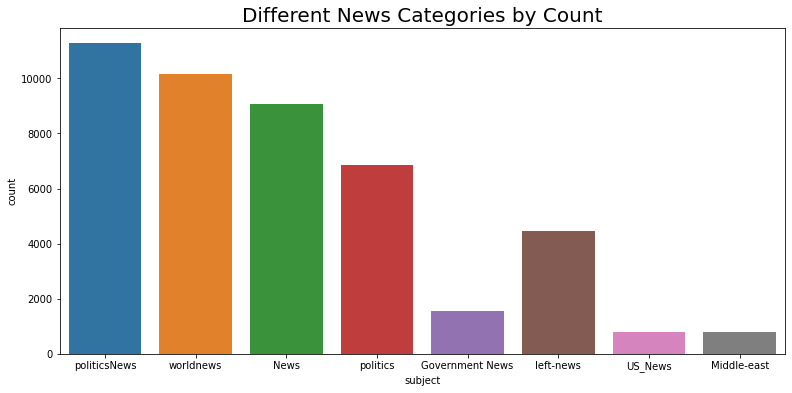

In [370]:
## Analyzing Null Values in both DataFrames 
plt.figure(figsize=(13, 6))
plt.title("Different News Categories by Count", fontsize=20)
sns.countplot(df['subject'])

[[Text(0, 0, 'Real'), Text(1, 0, 'Fake')]]

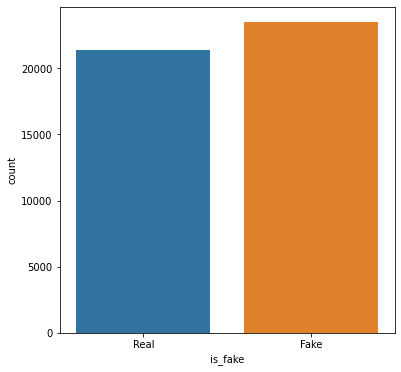

In [361]:
plt.figure(figsize=(6,6))
g = sns.countplot(df['is_fake'])
g.set(xticklabels=['Real','Fake'])

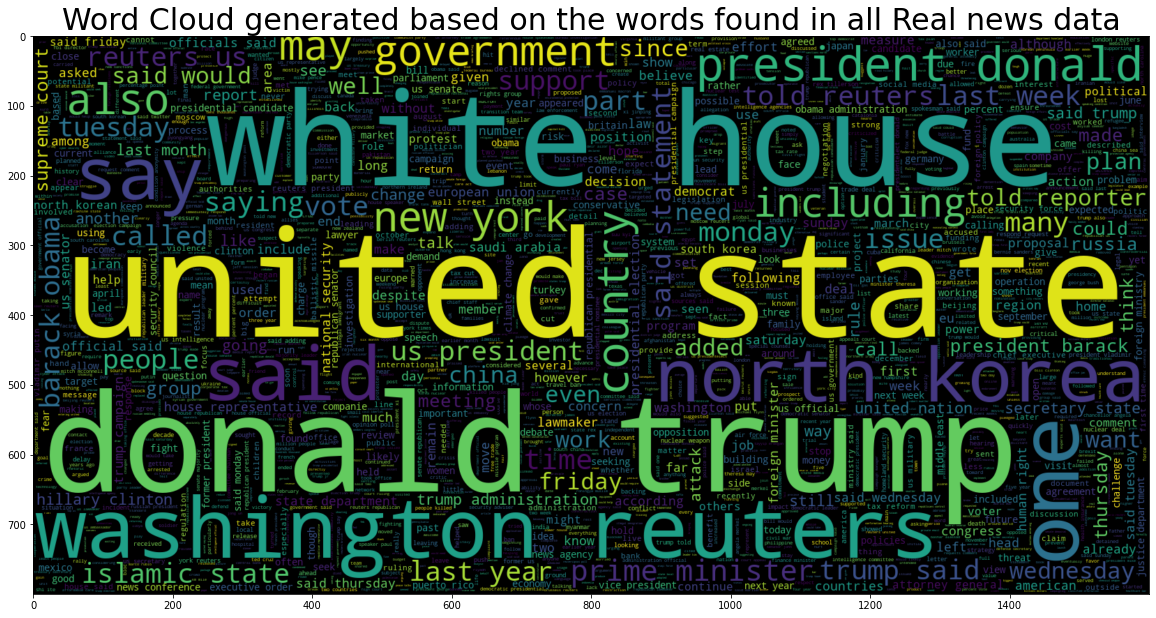

In [374]:
# Printing Word Cloud of all the words found in the Real News Texts 
stop_words = set(stopwords.words('english')) 

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000, 
               width = 1600 , 
               height = 800 , 
               stopwords = stop_words).generate(" ".join(df[df.is_fake == 0].combined))
plt.title("Word Cloud generated based on the words found in all Real news data", fontsize=30)
plt.imshow(wc, interpolation = 'bilinear')

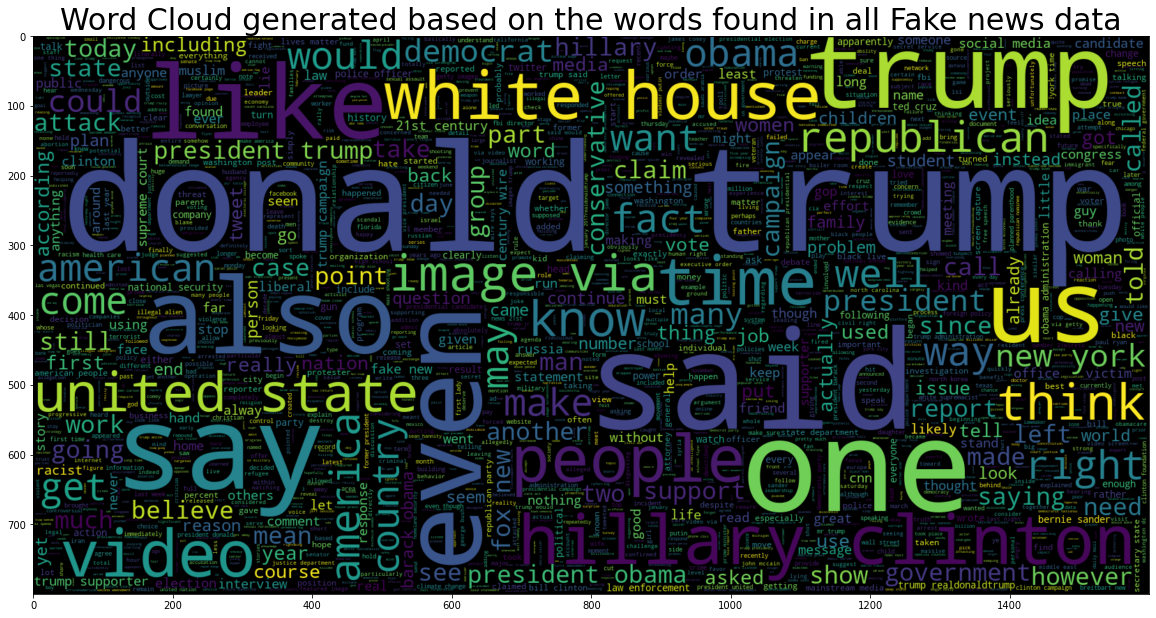

In [376]:
# Printing Word Cloud of all the words found in the Fake News Texts 
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000, 
               width = 1600 , 
               height = 800 , 
               stopwords = stop_words).generate(" ".join(df[df.is_fake == 1].combined))
plt.title("Word Cloud generated based on the words found in all Fake news data", fontsize=30)
plt.imshow(wc, interpolation = 'bilinear')

In [265]:
df

,title,text,subject,is_fake,combined
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,0,us budget fight looms republicans flip fiscal ...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,0,us military accept transgender recruits monday...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,0,senior us republican senator let mr mueller jo...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,0,fbi russia probe helped australian diplomat ti...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,0,trump wants postal service charge much amazon ...
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,1,mcpain john mccain furious iran treated us sai...
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,1,justice yahoo settles email privacy classactio...
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,1,sunnistan us allied ‘safe zone’ plan take terr...
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,1,blow 700 million al jazeera america finally ca...


# Building Machine Learning Models

In [278]:
# function is responsible for splitting the data into training, test and validation sets 
def split_train_test_val(df, input_columns, output_column):
    # Splitting the dataset into training and test sets 
    X_train, X_test, y_train, y_test = train_test_split(df[input_columns],
                                                        df[output_column].values,
                                                        test_size=0.3,
                                                       random_state=42)
    # Splitting test again into validation & final test set
    X_test, X_val, y_test, y_val = train_test_split(X_test,
                                                    y_test,
                                                    test_size=0.5,
                                                    random_state=42)
    
    return X_train, X_test, X_val, y_train, y_test, y_val 

In [285]:
# Splitting into train, test and validation dataset 
X_train, X_test, X_val, y_train, y_test, y_val  = split_train_test_val(df, ['combined'], 'is_fake')

# Count Vectorizer is traditional embedding approach that encodes the collection of text documents 
# into term/token counts 
vect = CountVectorizer()
# Let's fit the Vectorizer on Training Texts 
X_train_vect = vect.fit_transform(X_train['combined'].values)
# Transform the test dataset based on fitted training dataset 
X_test_vect = vect.transform(X_test['combined'].values)
# Transformt the validation dataset based on fitted training dataset 
X_val_vect = vect.transform(X_val['combined'].values)
# sorting indices 
X_train_vect.sort_indices() 
X_val_vect.sort_indices()
X_test_vect.sort_indices()

### Running & Evaluating Machine Learning Models

In [286]:
# Building Logistic Regression, Support Vector & Random Forest Models 
models = [   ('Logistic Regression', LogisticRegression(max_iter=500)),
             ('Support Vector', SVC()),
             ('Random Forest', RandomForestClassifier())
         ]
# Saving scores generated by running all models 
scores = {}
for name, model in models:
    # creating model object 
    m = model
    # fitting model 
    m.fit(X_train_vect, y_train)
    # get predictions 
    preds = m.predict(X_test_vect)
    # saving scores in dictionary for each model 
    scores[name] = {
        "Recall score": recall_score(y_test, preds),
        "Precision score": precision_score(y_test, preds),
        "Accuracy score": accuracy_score(y_test, preds)
    }

In [287]:
# Result generated for different Machine Learning Model based on Recall, Precision & acurracy metrics 
result = pd.DataFrame(scores).round(3)
result

,Logistic Regression,Support Vector,Random Forest
Recall score,0.997,0.995,0.990
Precision score,0.998,0.994,0.996
Accuracy score,0.998,0.994,0.993


# Building Neural Network Models

#### Building Model using Fully Connected Artificial Neural Network

In [336]:
# the function preservers the model architecture for Fully Connected Artifical Neural Network 
def build_ann_model(n_features):
    model = Sequential()
    # Input Layer 
    model.add(Dense(128, input_dim=n_features, activation='relu'))
    # Hidden Layer 
    model.add(Dense(128, activation='relu'))
    # Output Layer 
    model.add(Dense(1, activation='sigmoid'))
    # Compile Model with optimizer, loss and metrics 
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model 

In [289]:
ann_model = build_ann_model(X_train_vect.shape[1])

In [290]:
ann_model_history = ann_model.fit(X_train_vect, y_train, batch_size=128, epochs=5, validation_data=(X_val_vect, y_val))

Epoch 1/5
246/246 [==============================] - 28s 113ms/step - loss: 0.0673 - accuracy: 0.9825 - val_loss: 0.0332 - val_accuracy: 0.9918
Epoch 2/5
246/246 [==============================] - 28s 112ms/step - loss: 0.0049 - accuracy: 0.9990 - val_loss: 0.0510 - val_accuracy: 0.9912
Epoch 3/5
246/246 [==============================] - 28s 113ms/step - loss: 0.0062 - accuracy: 0.9994 - val_loss: 0.0617 - val_accuracy: 0.9917
Epoch 4/5
246/246 [==============================] - 27s 111ms/step - loss: 0.0051 - accuracy: 0.9998 - val_loss: 0.0491 - val_accuracy: 0.9924
Epoch 5/5
246/246 [==============================] - 35s 142ms/step - loss: 0.0027 - accuracy: 0.9998 - val_loss: 0.0629 - val_accuracy: 0.9924


In [293]:
preds_ann = ann_model.predict_classes(X_test_vect).reshape(1,-1)[0]

In [295]:
# Get Scores generated out from ANN
scores = {
    "Recall Score": recall_score(y_test, preds),
    "Precision Score": precision_score(y_test, preds),
    "Accuracy Score": accuracy_score(y_test, preds)
}

pd.DataFrame(scores, index=['Fully Connected Neural Network']).round(3)

,Recall Score,Precision Score,Accuracy Score
Fully Connected Neural Network,0.99,0.996,0.993


### Building Recurrent Neural Network Model

In [310]:
from nltk.tokenize import word_tokenize

# Get the list of all total words found from all text documents
total_words = [] 
for sent in df.combined.values:
    total_words.extend(word_tokenize(sent))
# Make a list of total words 
total_words = list(set(total_words))


# Creating a Tokenizer object using Keras Tokenizer
# here num_words --> total number of words found from all news article texts 
tokenizer = Tokenizer(num_words = len(total_words))
# Fitting it on training dataset 
tokenizer.fit_on_texts(X_train['combined'].values)
# Convert text into sequences 
train_sequences = tokenizer.texts_to_sequences(X_train['combined'].values)
test_sequences = tokenizer.texts_to_sequences(X_test['combined'].values)

# Pad the text to make sure all input text are of equal sequences 
padded_train = pad_sequences(train_sequences,maxlen = 60, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 60, truncating = 'post') 

In [312]:
def build_rnn_model(n_features):
    # Sequential Model
    rnn_model = Sequential()

    # embeddidng layer
    rnn_model.add(Embedding(n_features, output_dim = 128))

    # GRU is a type of Recurrent Neural Network that resolves the issue of Vanishing gradient problem faced by older generated 
    # LSTM RNN Network. Here we are a RNN layer made of GRU with 128 units. 
    rnn_model.add(GRU(128))

    # Dense layers
    rnn_model.add(Dense(128, activation = 'relu'))
    # Output Layer 
    rnn_model.add(Dense(1,activation= 'sigmoid'))
    # Compiling model 
    rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    rnn_model.summary()
    
    return rnn_model

In [313]:
rnn_model = build_rnn_model(len(total_words))
# train the model
history = rnn_model.fit(padded_train, y_train, batch_size = 128, validation_split = 0.1, epochs = 5)

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 128)         29456512  
_________________________________________________________________
gru_5 (GRU)                  (None, 128)               99072     
_________________________________________________________________
dense_38 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 129       
Total params: 29,572,225
Trainable params: 29,572,225
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
221/221 [==============================] - 120s 542ms/step - loss: 0.1463 - acc: 0.9172 - val_loss: 0.0054 - val_acc: 0.9987
Epoch 2/5
221/221 [==============================] - 128s 578ms/step - loss: 0.0033 - acc: 0.9995 - val_

In [315]:
rnn_preds = rnn_model.predict_classes(padded_test)

In [316]:
scores = {
    "Recall Score": recall_score(y_test, rnn_preds),
    "Precision Score": precision_score(y_test, rnn_preds),
    "Accuracy Score": accuracy_score(y_test, rnn_preds)
}

pd.DataFrame(scores, index=['Recurrent Neural Network'])

,Recall Score,Precision Score,Accuracy Score
Recurrent Neural Network,0.998848,0.99598,0.997327


# Building Neural Network model using wor2vec embeddings

### Using Word2Vec Embedding

Word2Vec are one of the widely used word embeddings these days. It is based on Shallow Neural Networks. These embeddings are capable of capturing contextual relationships in the sentences. Traditional embeddings including Bag-of-words use exhaustive vocabularies to map corresponding words in the sentences. Such approach does not scale well if we are dealing with large data sets. To build sophisticated model that understands relationships between text documents, word2vec comes into play a crucial role. 

In [206]:
import multiprocessing
workers = multiprocessing.cpu_count()
# Training the word2vec model on custom training dataset, i.e in our case we will feed all news article documents. 
sentences = df.combined.str.split(" ").values.tolist()
# Creating Word2Vec Model 
wv_model = Word2Vec(min_count=0,
        window=7,size=300,
        sample=0.01, workers=workers)
# Passing all the sentences to build vocab
wv_model.build_vocab(sentences,progress_per=5_000)
# training the model 
wv_model.train(sentences, total_examples=wv_model.corpus_count, epochs=10, report_delay=1)
print("Model Built!, saving model now")
# Saving the word2vec model in specified path below
path = "300features_w2vmodel"
wv_model.save(path)
w2v_shape = wv_model.wv.vectors.shape
print(f"Total No. of words in Word2Vec vocabulary: {w2v_shape[0]} and Features: {w2v_shape[1]}")

Model Built!, saving model now
Total No. of words in Word2Vec vocabulary: 254869 and Features: 300


In [317]:
# After training w2v model, we can test the model using different words. Here, the following functions returns all the words that present in the vector space.
def suggest_w2v_similar_words(word, model):
    return pd.DataFrame(model.wv.most_similar(word), columns=['Similiar Words', 'Vector'])

In [318]:
suggest_w2v_similar_words('misinformation',wv_model)

,Similiar Words,Vector
0,falsehoods,0.581615
1,propaganda,0.557971
2,hysteria,0.545057
3,bots,0.534553
4,narratives,0.533201
5,hoaxes,0.523692
6,disinformation,0.522888
7,malicious,0.521007
8,distorted,0.512204
9,spreading,0.512185


In [213]:
suggest_w2v_similar_words('fact',wv_model)

,Similiar Words,Vector
0,completely,0.472372
1,actually,0.467221
2,facts,0.456368
3,obvious,0.452470
4,unfortunately,0.436429
5,however,0.400985
6,simply,0.396146
7,indeed,0.389459
8,incapable,0.386666
9,seems,0.385118


In [319]:
def get_mean_vector(model, words):
    # stores only those words that are found word2vec vocab 
    words = [word for word in words if word in model.wv.vocab]
    if len(words) >= 1:
        # compute mean vector 
        return np.mean(model.wv[words], axis=0)
    else:
        # if no word in the vocab, 
        return np.zeros((300,))

# For each sentence, feature vectors are generated. It will take all the word tokens found in the sentence and take the mean of the vectors
# as found from the trained word2vec model 
def generate_feature_vector(df, model):
    feature_vectors = [] 
    # split all the sentence into list of word tokens 
    sentences = df.combined.str.split(" ").values
    for sent in sentences:
        # get mean vector for each sentence 
        mean_vector = get_mean_vector(model, sent)
        feature_vectors.append(mean_vector)
        
    return feature_vectors

In [324]:
# Generate Feature Vectors 
feature_vectors = generate_feature_vector(df, wv_model)

# Create feature vector column
df['w2v_vectors'] = feature_vectors

In [331]:
# Splitting data into training, test and validation sets
X_train, X_test, X_val, y_train, y_test, y_val  = split_train_test_val(df, ['w2v_vectors'], 'is_fake')
# fixing input training and test sets 
X_train = np.array([x for x in X_train['w2v_vectors'].values])
X_test = np.array([x for x in X_test['w2v_vectors'].values])

In [338]:
# Building ANN model
ann_model_w2v = build_ann_model(300)

In [339]:
w2v_history = ann_model_w2v.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
221/221 [==============================] - 2s 8ms/step - loss: 0.1190 - accuracy: 0.9546 - val_loss: 0.0622 - val_accuracy: 0.9790
Epoch 2/10
221/221 [==============================] - 1s 2ms/step - loss: 0.0469 - accuracy: 0.9841 - val_loss: 0.0452 - val_accuracy: 0.9831
Epoch 3/10
221/221 [==============================] - 1s 3ms/step - loss: 0.0353 - accuracy: 0.9882 - val_loss: 0.0479 - val_accuracy: 0.9803
Epoch 4/10
221/221 [==============================] - 0s 2ms/step - loss: 0.0308 - accuracy: 0.9893 - val_loss: 0.0542 - val_accuracy: 0.9809
Epoch 5/10
221/221 [==============================] - 1s 2ms/step - loss: 0.0240 - accuracy: 0.9920 - val_loss: 0.0363 - val_accuracy: 0.9898
Epoch 6/10
221/221 [==============================] - 0s 2ms/step - loss: 0.0224 - accuracy: 0.9927 - val_loss: 0.0343 - val_accuracy: 0.9905
Epoch 7/10
221/221 [==============================] - 0s 2ms/step - loss: 0.0182 - accuracy: 0.9942 - val_loss: 0.0593 - val_accuracy: 0.9809
Epoch 

In [340]:
# Get predictions generated from word2vec model 
preds_w2v = ann_model_w2v.predict_classes(X_test).reshape(1,-1)[0]

In [341]:
scores = {
    "Recall Score": recall_score(y_test, preds_w2v),
    "Precision Score": precision_score(y_test, preds_w2v),
    "Accuracy Score": accuracy_score(y_test, preds_w2v)
}

pd.DataFrame(scores, index=['Fully Connected ANN using word2vec'])

,Recall Score,Precision Score,Accuracy Score
Fully Connected ANN using word2vec,0.99309,0.992518,0.992576
